# <h1 style="background-color:#383530; padding:10px; font-weight:700; text-align:center; color:white;">Customer Segmentation</h1>

## Introduction

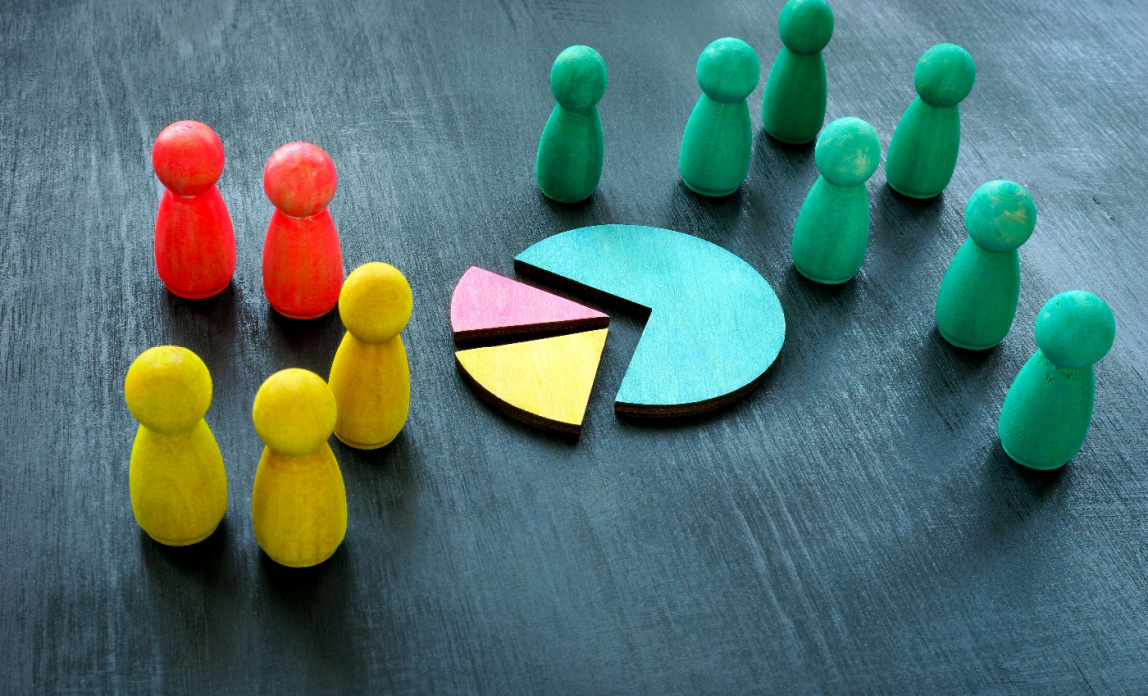

In [1]:
from IPython.display import Image, display

# Display the image
display(Image(filename='cs.jpg'))

###
<div style="margin:0;">
    <h2 style="background-color:#383530; padding:10px; font-weight:700; margin:0;">Introduction</h2>
    <h4 style="background-color:#fff5f5; color:black; padding:10px 10px 0px; font-weight:700; margin:0;">Problem Statement</h4>
    <p style="background-color:#fff5f5; color:black; margin:0; padding:10px; text-align:justify;">
        Every business serves different types of customers, each with unique preferences, spending habits, and levels of engagement. When companies treat all customers the same, marketing efforts often become less effective, resources are wasted, and customer satisfaction declines. To remain competitive, businesses must understand their customer base at a deeper level. Customer segmentation provides a solution by grouping customers into distinct categories based on their similarities, which helps companies make informed decisions, improve targeting, and increase profitability.
    </p>
    <h4 style="background-color:#fff5f5; color:black; padding:10px 10px 0px; font-weight:700; margin:0;">Objective</h4>
    <div style="background-color:#fff5f5; color:black; margin:0; padding:10px; text-align:justify;">
        <p>The main objective of this project is to apply data-driven techniques to segment customers into meaningful groups. Specifically, the project seeks to:</p>
        <ul style="margin:0; padding-left:20px;">
            <li>Collect and prepare customer data for analysis.</li>
            <li>Use clustering methods (e.g., K-Means) to group customers with similar characteristics.</li>
            <li>Analyze and describe the unique features of each customer segment.</li>
            <li>Provide actionable insights that businesses can use to tailor marketing strategies, strengthen customer relationships, and drive growth.</li>
        </ul>
    </div>
</div>


## <h1 style="background-color:#383530; padding:10px; font-weight:700; text-align:center; color:white;">Importing Libraries</h1>

In [2]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
# from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

import summarytools as st
from sklearn.impute import SimpleImputer

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [3]:
sns.set()
custom_colors = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
sns.set_palette(custom_colors)

## <h1 style="background-color:#383530; padding:10px; font-weight:700; text-align:center; color:white;">Loading the Dataset</h1>

In [4]:
# Reading the train CSV file
df = pd.read_csv("customer_segmentation.csv")

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## <h1 style="background-color:#383530; padding:10px; font-weight:700; text-align:center; color:white;">Basic Exploration and Cleaning</h1>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.shape

(2240, 29)

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

- The dataset has 29 features and 2240 observations

<table class="responsive-table" 
       style="border-collapse: collapse; font-family: Arial, sans-serif; background-color: #fff5f5; color: black; width:100%;">
    <thead>
        <tr>
            <th style="border: 1px solid #000; padding: 8px; text-align: left; background-color: #9F8A78;">Column</th>
            <th style="border: 1px solid #000; padding: 8px; text-align: left; background-color: #9F8A78;">Description</th>
        </tr>
    </thead>
    <tbody>
        <tr><td style="border: 1px solid #000; padding: 8px;">ID</td><td style="border: 1px solid #000; padding: 8px;">A unique identifier for each customer.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">Year_Birth</td><td style="border: 1px solid #000; padding: 8px;">The year the customer was born.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">Education</td><td style="border: 1px solid #000; padding: 8px;">Customer's education level, providing insights into educational background and potential buying behavior.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">Marital_Status</td><td style="border: 1px solid #000; padding: 8px;">The customer's marital status.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">Income</td><td style="border: 1px solid #000; padding: 8px;">The customer's annual income.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">Kidhome</td><td style="border: 1px solid #000; padding: 8px;">Number of children living at the customer's home.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">Teenhome</td><td style="border: 1px solid #000; padding: 8px;">Number of teenagers living at the customer's home.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">Dt_Customer</td><td style="border: 1px solid #000; padding: 8px;">Date the customer first became a customer (used for relationship duration analysis).</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">Recency</td><td style="border: 1px solid #000; padding: 8px;">Number of days since the customer's last interaction or purchase.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">MntWines</td><td style="border: 1px solid #000; padding: 8px;">Amount spent on wine.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">MntFruits</td><td style="border: 1px solid #000; padding: 8px;">Amount spent on fruit.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">MntMeatProducts</td><td style="border: 1px solid #000; padding: 8px;">Amount spent on meat products.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">MntFishProducts</td><td style="border: 1px solid #000; padding: 8px;">Amount spent on fish products.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">MntSweetProducts</td><td style="border: 1px solid #000; padding: 8px;">Amount spent on sweet products.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">MntGoldProds</td><td style="border: 1px solid #000; padding: 8px;">Amount spent on gold products.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">NumDealsPurchases</td><td style="border: 1px solid #000; padding: 8px;">Number of purchases made with a discount or promotion.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">NumWebPurchases</td><td style="border: 1px solid #000; padding: 8px;">Number of purchases made via the website.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">NumCatalogPurchases</td><td style="border: 1px solid #000; padding: 8px;">Number of purchases made through a catalog.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">NumStorePurchases</td><td style="border: 1px solid #000; padding: 8px;">Number of purchases made in a physical store.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">NumWebVisitsMonth</td><td style="border: 1px solid #000; padding: 8px;">Number of times the customer visits the website per month.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">AcceptedCmp1</td><td style="border: 1px solid #000; padding: 8px;">Indicates whether the customer accepted campaign 1 (1 = Yes, 0 = No).</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">AcceptedCmp2</td><td style="border: 1px solid #000; padding: 8px;">Indicates whether the customer accepted campaign 2 (1 = Yes, 0 = No).</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">AcceptedCmp3</td><td style="border: 1px solid #000; padding: 8px;">Indicates whether the customer accepted campaign 3 (1 = Yes, 0 = No).</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">AcceptedCmp4</td><td style="border: 1px solid #000; padding: 8px;">Indicates whether the customer accepted campaign 4 (1 = Yes, 0 = No).</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">AcceptedCmp5</td><td style="border: 1px solid #000; padding: 8px;">Indicates whether the customer accepted campaign 5 (1 = Yes, 0 = No).</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">Complain</td><td style="border: 1px solid #000; padding: 8px;">Indicates whether the customer filed a complaint (1 = Yes, 0 = No).</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">Z_CostContact</td><td style="border: 1px solid #000; padding: 8px;">The cost incurred each time the company contacts the customer.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">Z_Revenue</td><td style="border: 1px solid #000; padding: 8px;">The revenue generated per contact with the customer.</td></tr>
        <tr><td style="border: 1px solid #000; padding: 8px;">Response</td><td style="border: 1px solid #000; padding: 8px;">Indicates whether the customer responded to a marketing campaign (1 = Yes, 0 = No).</td></tr>
    </tbody>
</table>


In [9]:
st.dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID[int64],Mean (sd) : 5592.2 (3246.7)min < med < max:0.0 < 5458.5 < 11191.0IQR (CV) : 5599.5 (1.7),"2,240 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACfklEQVR4nO3dT2saQRyH8Zlq4lbFxT/ozTcQ6EHw4gvosS+2LyGCh559B94EEcVtFtfVsqWBFoQ6s5r9rj6fWwiThPBkfjMrQXs6nQyg4lPRPwDwt+o/HwEXstZ+NsY8Gz/70+n0du4TBAmvGLvd7rdWq9V2X23MdrtdW2u/n4uSIOHjOYtxMpm8hWEYuyzcbDbBbDZrr1arbHclyCLG0L0KwzDu9/s/PZZmv+ezCPIDxhAud3dB5tjlWs1msz+ZTLbXHkMoeZA5ogo6nc7XMAwbrguTJAnSNH2p1Wqv1x5DKHGQeUZnFpUx5mU8Hv/o9Xpbl7WLxaI9n8/rh8Oh4vp98UFBFnTI977BvUcVBEHiusut1+tcO1yapk/Z2LfW+ix/uAuRc5BFH/J9bnB5o/IVRdFTkiRfhsNhpVKpOP0RZbgQXbZD5nrWNJ1O+6vVqmetdRqd2S5zPB6z3aY09vt9NQiC+mg0igeDwdplLRcixzOkz06VZ8d4v1zEcfxqjPG5XBSm0Wh4PZdL07TFuL/hpSbPjvFol4six73N8YjsVlOsqrZjFHUOfLRxb3M+zbjVFJN77POoChj3Ld8XAm45xQiyxKIrnNV9Xgi45RQjyBLb3+FZnSDvQOOOzur8CwOkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECRMqd7rMHtPZtcvutvtfq+JoihYLpd11rLW/PG/nn4B7U2RkB2c+QcAAAAASUVORK5CYII="">",0(0.0%)
2,Year_Birth[int64],Mean (sd) : 1968.8 (12.0)min < med < max:1893.0 < 1970.0 < 1996.0IQR (CV) : 18.0 (164.3),59 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB+0lEQVR4nO3csWrCQBzH8btG26uWHCro5gsUOji6d+3D9hE6OHT2DdxECYrWkBhTAh3sUjBN6S/m+9kEDxy+GJL872ye5wZQcfPfPwA41/r2CbVjrb03xtyWXJ7keX4wQgiy5jEOBoOXMAx7ZdZvt9vIWvuqFCVB1tttEeN0Oj147+NLFm42GzebzXrr9br4dyVIVMd7Hw+Hw48SS4vLvRRuaiCFICGFICGFICGFICGFICGFICGFICGFICGFNzX1HpAIT6dT21wRgqzxgESapi7Lssc4jt+MMWVeHcohyBoPSCwWi958Pu8cj8fAXAmCrPGARBRFvxqOyLKsuNyH1lqZWUqCbKj9ft9O0/RpPB4HQRBc9M/8l7OUBNlQSZK0nHOdyWQSj0ajSGWWkiAbrtvtSs1S8hwSUggSUggSUggSUggSUggSUggSUggSUggSUggSUggSUggSUggSUggSUhg/qwgbtapBkBVgo1Z1CLIabNSqCEHWfKPWteGmBlIIElIIElIIElIIElIIElJ47AOpc4EIElLnAhEkpM4FIkhInQvETQ2kECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkMFxxhtMnxIO01jpjzJ1pBtfv95+99w9lT59YrVbvl67d7Xbua8bQLZfLzrWvLcbPfvrCJ1u140Uy+Wd8AAAAAElFTkSuQmCC"">",0(0.0%)
3,Education[object],1. Graduation2. PhD3. Master4. 2n Cycle5. Basic,"1,127 (50.3%)486 (21.7%)370 (16.5%)203 (9.1%)54 (2.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACIklEQVR4nO3bQYraYACG4aRIaTfKIHgYD9HD9hDeRoouOqUbS3oCMzCvmjzPYnaiyEsykf8bb7fbAIUvybuA2CiJjcw4DMP3YRi+dm+5GH9vt9v7oz/EK9ns9/sf2+327dEf5NVcr9df4zj+FNz9NlNox+Pxfbfb/ZnxulW7XC7fTqfT2/l8nu4IYrvTZvozhXY4HH7f+yL+m/79YAYPCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbLSnPqYjM91bvj7f18dspkOA09ksR2bmmb636bTuoz/HK3Es/OMcC59ptBul4gGBVd5G3ZYW7mnWVdZKy/cU6yprpXV4pnWVn14WzgMCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREb61pXPfr9Wdm6ylpp+RwLJ2NdRcYDAou8jbpNrly2rrKeIllXWU9Rr6usp1bOAwIZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERvLWldZT5Guq6yncCycjHUVL3Flc6WiGbwYsJAMXgxYqAcvBizM4kddMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmLjuddV1lKk6yprKeayQSBjXcVDr2yuWDTrKqspknWV1RT1uspqik/hR10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYuMx6yqrKdJ1ldUUn8UGgYx1FRkPCGTExlD5Bzt1DjcKz/uEAAAAAElFTkSuQmCC"">",0(0.0%)
4,Marital_Status[object],1. Married2. Together3. Single4. Divorced5. Widow6. Alone7. Absurd8. YOLO,864 (38.6%)580 (25.9%)480 (21.4%)232 (10.4%)77 (3.4%)3 (0.1%)2 (0.1%)2 (0.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC8klEQVR4nO3czU0bUQBG0TfIys8GCyFRQtKDi6DYFEER6cGKYBGSbBxNByzgeux3ziJbjHQ1j7Hel+V0Og0o3CQ/BcRGSWxkxEZGbGTERmYZY3wdY3wa8/h3Op1ez/0hZrS7v79/vL29vRuTeHl5+bUsyw/B9XZraIfD4XW/3/8ZV+75+fnL09PT

### Handling Missing Values

In [10]:
# Check if any of the columns has na
df.isna().sum().any()

True

In [11]:
# Check columns with na
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- All the columns are free from NA except income with 24 NAs

In [12]:
# Checking all the records with NaN Income
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [13]:
# Replacing the NaN in income with the median value
imputer = SimpleImputer(strategy='median')

df[['Income']] = imputer.fit_transform(df[['Income']])

In [14]:
# Check again if any of the columns has na
df.isna().sum().any()

False

- So, all the columns are free from na

### Check Duplicate

In [15]:
df.duplicated().sum()

0

The data has no duplicate

### Check Descriptive Statistics 

In [16]:
# Check descriptive statistics
df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.2,3246.7,0.0,2828.2,5458.5,8427.8,11191.0
Year_Birth,2240.0,1968.8,12.0,1893.0,1959.0,1970.0,1977.0,1996.0
Income,2240.0,52238.0,25038.0,1730.0,35538.8,51381.5,68289.8,666666.0
Kidhome,2240.0,0.4,0.5,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,0.5,0.5,0.0,0.0,0.0,1.0,2.0
Recency,2240.0,49.1,29.0,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,303.9,336.6,0.0,23.8,173.5,504.2,1493.0
MntFruits,2240.0,26.3,39.8,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2240.0,167.0,225.7,0.0,16.0,67.0,232.0,1725.0
MntFishProducts,2240.0,37.5,54.6,0.0,3.0,12.0,50.0,259.0


<style>
li {
    margin-bottom: 6px;
}
li:last-child {
    margin-bottom: 0px;
}
</style>

<div style="margin:0; width:100%;">
    <h3 style="background-color:#9F8A78; color:black; padding:5px 10px; font-weight:700; margin:0;">Key Observations</h3>
    <ul style="background-color:#fff5f5; padding:15px 25px; color:black; font-family:Arial, sans-serif; margin:0" class="responsive-list">
        <li><strong>Customer Demographics</strong>
            <ul>
                <li>2,240 customers with wide income range ($1,730 – $666,666)</li>
                <li>Older customer base (few kids/teens at home)</li>
            </ul>
        </li>
        <li><strong>Purchase Patterns</strong>
            <ul>
                <li>Wine is dominant product category (mean $304 vs others &lt; $170)</li>
                <li>- Customers make more store visits (5.8) than web purchases (4.1) or catalog purchases (2.7)</li>
                <li>Most customers haven't purchased recently (average 49 days ago)</li>
            </ul>
        </li>
        <li><strong>Marketing Performance</strong>
            <ul>
                <li>Very low digital campaign acceptance (&lt; 1% for all campaigns)</li>
                <li>Traditional channels outperform digital</li>
            </ul>
        </li>
        <li><strong>Segmentation Potential</strong>
            <ul>
                <li>Clear income-based segments</li>
                <li>Product preference clusters (wine buyers vs others)</li>
                <li>Channel preference differences</li>
            </ul>
        </li>
    </ul>
</div>


In [17]:
# Calculate "Age" of a customer by the "Year_Birth".(indicating the birth year of the respective person.) We will calculate age till 2014. As we have data till 2014.
df['Age_on_2014'] = 2014 - df['Year_Birth']

# Join all the spending together
df['Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Add new feature "Children" to indicate total children in household (kid + Teen)
df['Children'] = df['Kidhome'] + df['Teenhome']

# Add new feature "Is_parent" indicating parenthood status.
df['Is_parent'] = np.where(df.Children > 0, 1, 0)

In [18]:
continuous_features = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age_on_2014', 'Spending', 'Children', ]

In [19]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

ID                       0
Year_Birth               3
Income                   8
Kidhome                  0
Teenhome                 0
Recency                  0
MntWines                35
MntFruits              227
MntMeatProducts        175
MntFishProducts        223
MntSweetProducts       248
MntGoldProds           207
NumDealsPurchases       86
NumWebPurchases          4
NumCatalogPurchases     23
NumStorePurchases        0
NumWebVisitsMonth        8
AcceptedCmp3           163
AcceptedCmp4           167
AcceptedCmp5           163
AcceptedCmp1           144
AcceptedCmp2            30
Complain                21
Z_CostContact            0
Z_Revenue                0
Response               334
Age_on_2014              3
Spending                 3
Children                53
dtype: int64

In [20]:
# # Delete outliers from Income and Age
# cols_to_filter = ["Income", "Age_on_2014"]

# # Build mask for rows that are NOT outliers in both columns
# mask = ~(
#     (df[cols_to_filter] < (Q1 - 1.5 * IQR)) |
#     (df[cols_to_filter] > (Q3 + 1.5 * IQR))
# ).any(axis=1)

# # Apply mask to remove outliers
# df = df[mask].copy()

In [21]:
# Delete outliers from Income and Age_on_2014
cols_to_filter = ["Income", "Age_on_2014"]

# Compute IQR only for the selected columns
Q1 = df[cols_to_filter].quantile(0.25)
Q3 = df[cols_to_filter].quantile(0.75)
IQR = Q3 - Q1

# Build mask for rows that are NOT outliers in either column
mask = ~(
    (df[cols_to_filter] < (Q1 - 1.5 * IQR)) |
    (df[cols_to_filter] > (Q3 + 1.5 * IQR))
).any(axis=1)

# Apply mask to remove outliers
df = df[mask].copy()

df.shape  # check new shape after removing outliers


(2229, 33)

## <h1 style="background-color:#383530; padding:10px; font-weight:700; text-align:center; color:white;">Exploratory Data Analysis (EDA)</h1>

### Univirate Analysis

In [22]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None, save_path=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    save_path: file path to save the plot (default None, doesn't save)
    """
    # Suppress the FutureWarning related to use_inf_as_na
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        
        # Plotting
        f2, (ax_box2, ax_hist2) = plt.subplots(
            nrows=2,  # Number of rows of the subplot grid= 2
            sharex=True,  # x-axis will be shared among all subplots
            gridspec_kw={"height_ratios": (0.25, 0.75)},
            figsize=figsize)  # creating the 2 subplots

        sns.boxplot(
            data=data, x=feature, ax=ax_box2, showmeans=True, color=custom_colors[4])  # Boxplot
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color=custom_colors[0]) if bins else sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, color=custom_colors[0])  # Histogram

        # Add mean and median lines
        ax_hist2.axvline(data[feature].mean(), color="#176d9c", linestyle="--")
        ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

        # Save the figure if save_path is provided
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')

        # Show the plot
        plt.show()


<h4 style="background-color:#9F8A78; color:black; padding:10px; font-weight:700; margin:0;">Distribution of Age</h4>

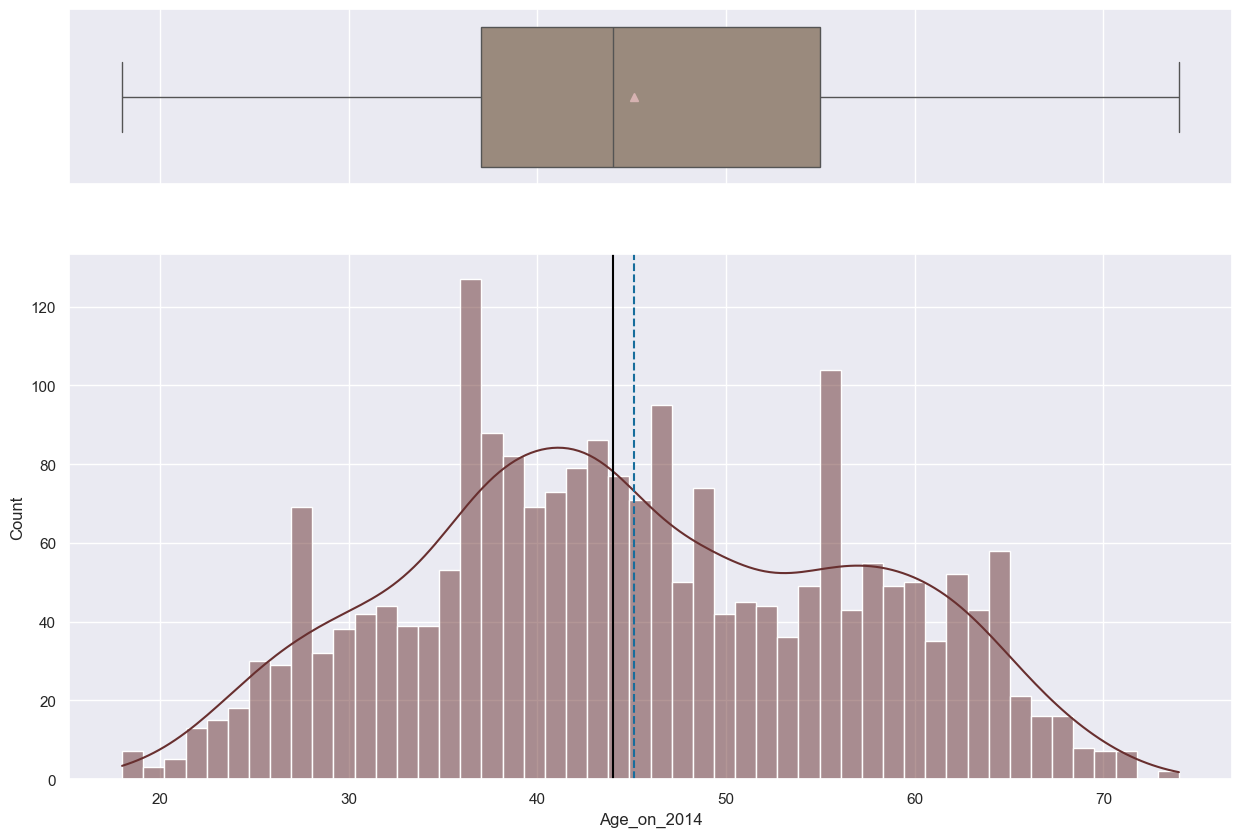

In [23]:
histogram_boxplot(df, "Age_on_2014", bins=50)

**Key Findings:**
- Age distribution is approximately normal with slight bimodal pattern
- Primary peak around age 40-45
- Secondary peak around age 60-65
- Mean age appears to be around 45-50 years (indicated by vertical lines)
- Box plot shows balanced quartiles with median around 50
- Age range spans from approximately 20 to 75 years

<h4 style="background-color:#9F8A78; color:black; padding:10px; font-weight:700; margin:0;">Distribution of Income</h4>

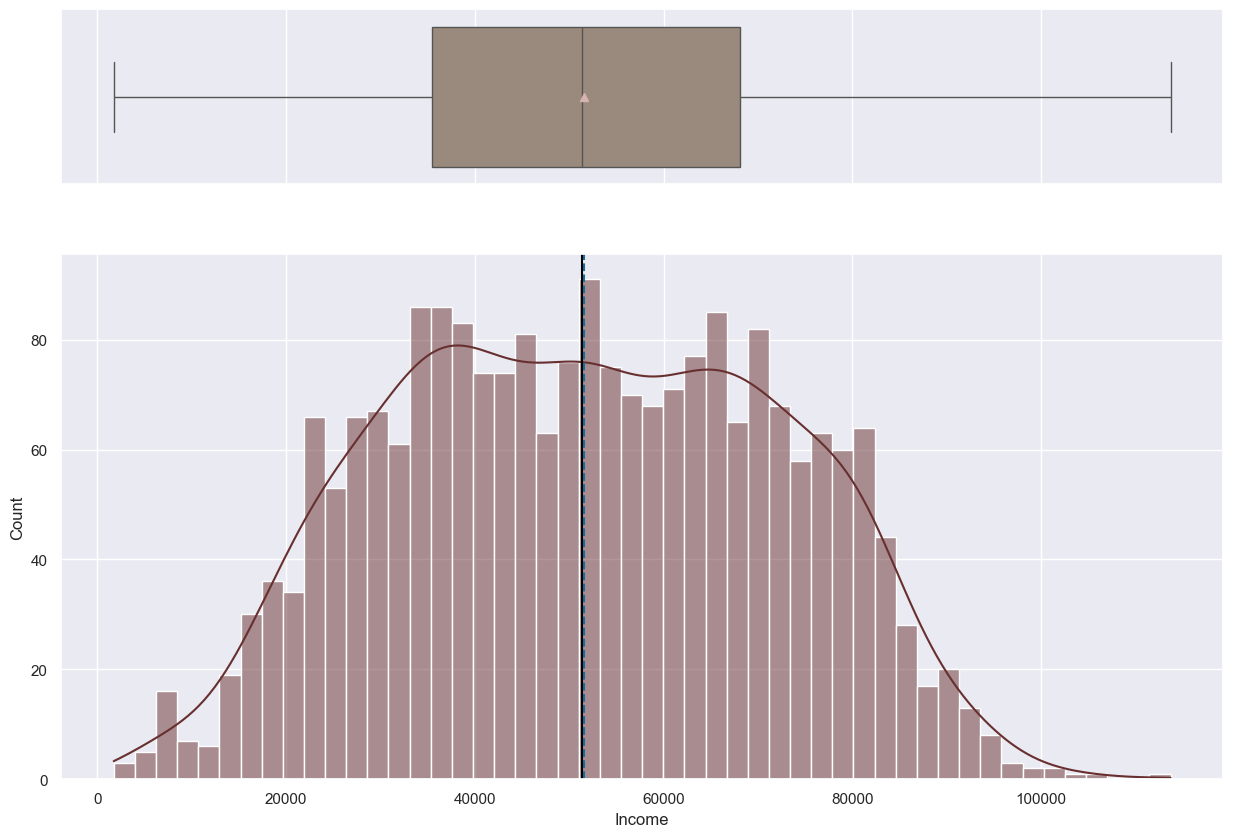

In [24]:
histogram_boxplot(df, "Income", bins=50)

**Key Findings:**
- Income distribution is approximately normal with slight right skew
- Peak concentration around $50,000-60,000 (indicated by vertical line)
- Box plot shows median around $50,000 with balanced quartiles
- Income range spans from near $0 to approximately $100,000+ 
- Distribution shows good spread across middle-income ranges
- Few customers at very low (<$20,000) or very high (>$80,000) income levels

<h4 style="background-color:#9F8A78; color:black; padding:10px; font-weight:700; margin:0;">Distribution of Recency</h4>

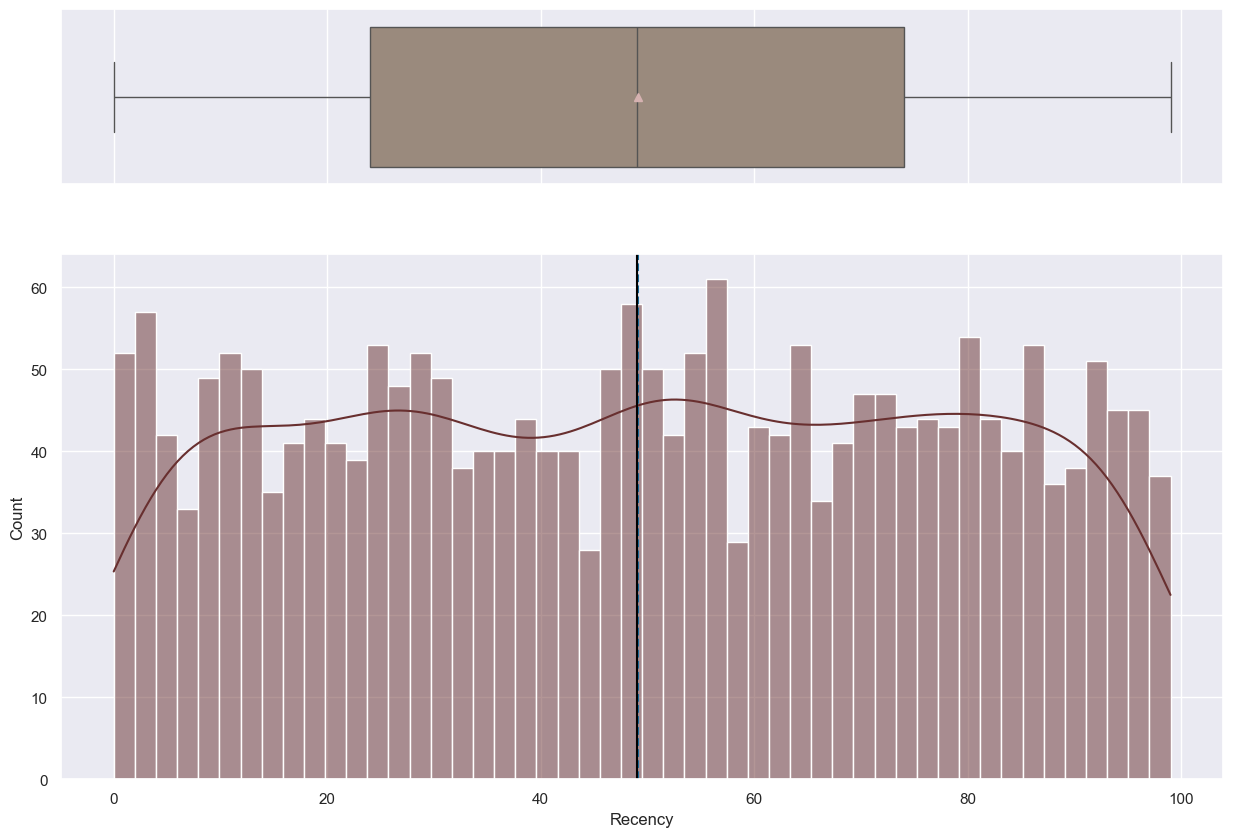

In [25]:
histogram_boxplot(df, "Recency", bins=50)

**Key Findings:**
- Relatively uniform distribution across all recency values (0-99 days)
- No clear peak, suggesting varied customer purchase timing
- Box plot shows fairly balanced quartiles with median around 50 days
- Some customers purchased very recently (0 days) while others haven't purchased in 99+ days

<h4 style="background-color:#9F8A78; color:black; padding:10px; font-weight:700; margin:0;">Distribution of Amount Spent on Stuffs</h4>

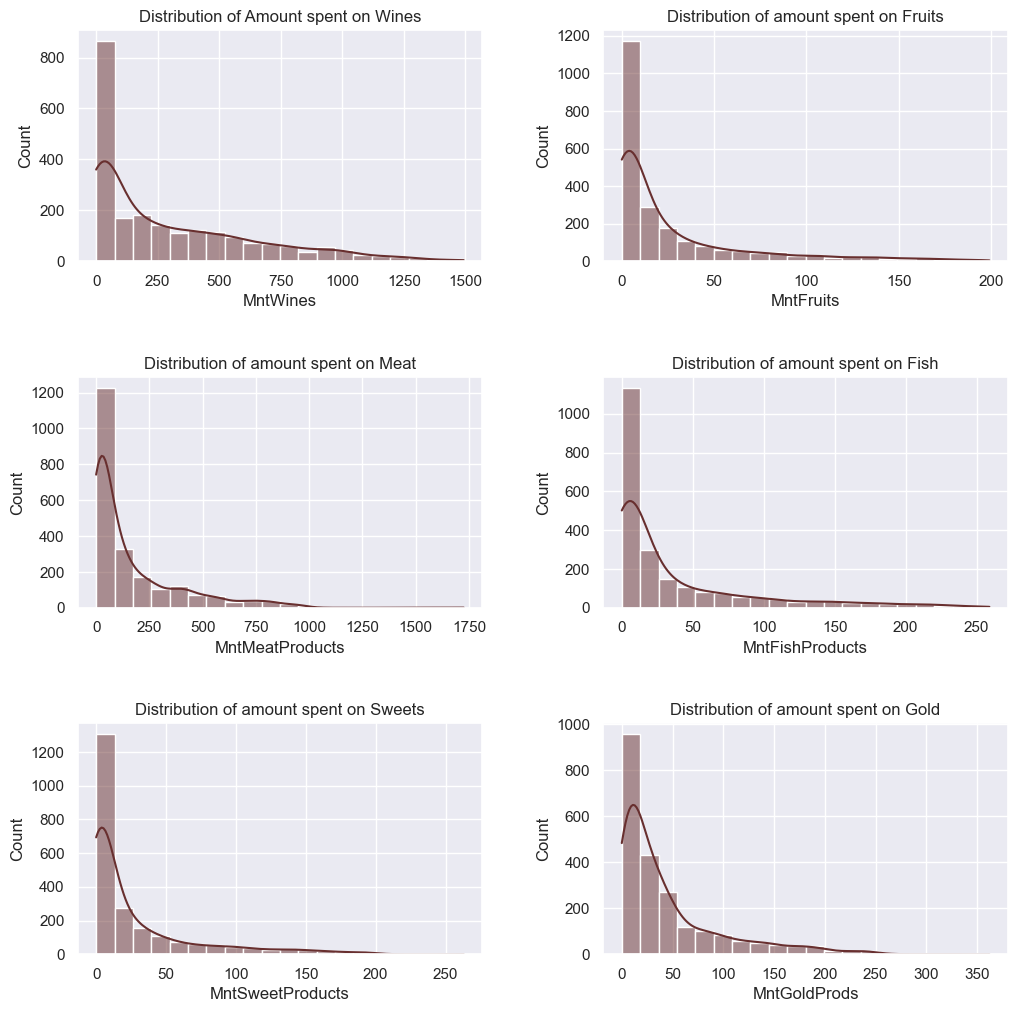

In [26]:
plt.figure(figsize = (12, 12))
plt.subplots_adjust(hspace = 0.5, wspace=0.3)

plt.subplot(3, 2, 1)
sns.histplot(df, x = "MntWines", kde = True, bins = 20)
plt.title("Distribution of Amount spent on Wines")

plt.subplot(3, 2, 2)
sns.histplot(df, x = 'MntFruits', kde = True, bins = 20)
plt.title("Distribution of amount spent on Fruits")

plt.subplot(3, 2, 3)
sns.histplot(df, x = 'MntMeatProducts', kde = True, bins = 20)
plt.title("Distribution of amount spent on Meat")

plt.subplot(3, 2, 4)
sns.histplot(df, x = 'MntFishProducts', kde = True, bins = 20)
plt.title("Distribution of amount spent on Fish")

plt.subplot(3, 2, 5)
sns.histplot(df, x = 'MntSweetProducts', kde = True, bins = 20)
plt.title("Distribution of amount spent on Sweets")

plt.subplot(3, 2, 6)
sns.histplot(df, x = 'MntGoldProds', kde = True, bins = 20)
plt.title("Distribution of amount spent on Gold")

plt.show()

**Key Findings:**
- All product categories show highly right-skewed distributions
- Most customers spend very little or nothing on each product category
- Wine and meat products have spending ranges up to ~1500
- Fish, sweets, and gold products have spending ranges up to ~250-300
- Fruits has the lowest spending range up to ~200
- Large concentration of customers at zero spending across all categories

<h4 style="background-color:#9F8A78; color:black; padding:10px; font-weight:700; margin:0;">Distribution of Purchases</h4>

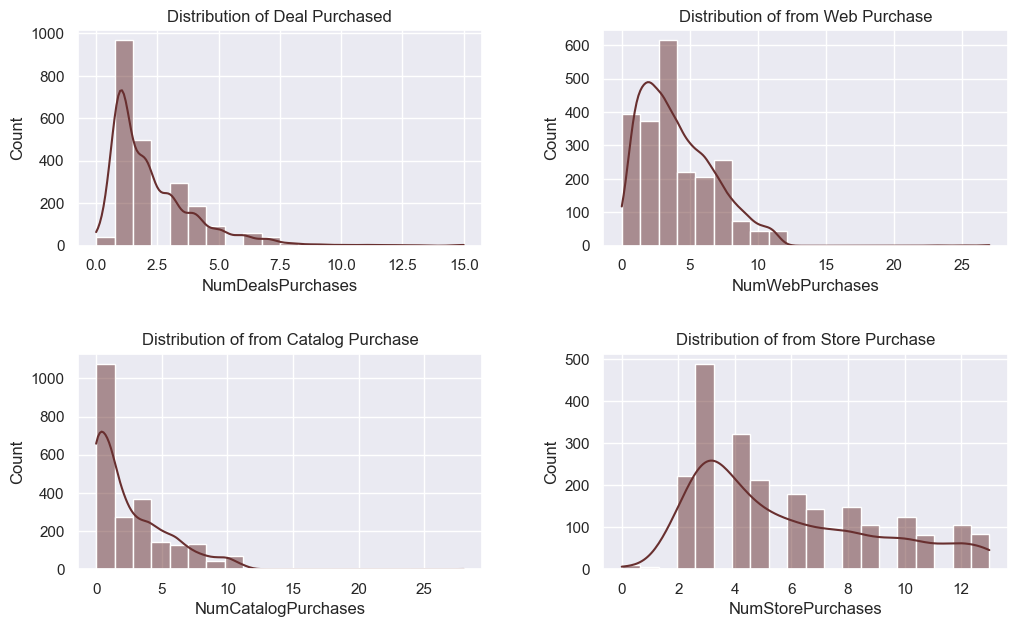

In [27]:
plt.figure(figsize=(12, 7))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# 4 plots -> 2 columns -> needs 2 rows
plt.subplot(2, 2, 1)
sns.histplot(df, x="NumDealsPurchases", kde=True, bins=20)
plt.title("Distribution of Deal Purchased")

plt.subplot(2, 2, 2)
sns.histplot(df, x="NumWebPurchases", kde=True, bins=20)
plt.title("Distribution of from Web Purchase")

plt.subplot(2, 2, 3)
sns.histplot(df, x="NumCatalogPurchases", kde=True, bins=20)
plt.title("Distribution of from Catalog Purchase")

plt.subplot(2, 2, 4)
sns.histplot(df, x="NumStorePurchases", kde=True, bins=20)
plt.title("Distribution of from Store Purchase")

plt.show()


**Key Findings:**
- All purchase channels show right-skewed distributions
- Deal purchases: Peak at 1-2 purchases, majority have 0-3 deals
- Web purchases: Peak at 2-4 purchases, extends to ~25 purchases
- Catalog purchases: Peak at 0-1 purchases, majority make very few catalog orders
- Store purchases: More spread distribution, peak around 3-5 purchases, extends to ~13 purchases


In [28]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age_on_2014', 'Spending', 'Children', 'Is_parent'],
      dtype='object')

<h4 style="background-color:#9F8A78; color:black; padding:10px; font-weight:700; margin:0;">Education and Marital Status Distribution</h4>

In [29]:
categorical_columns= ['Education', 'Marital_Status']

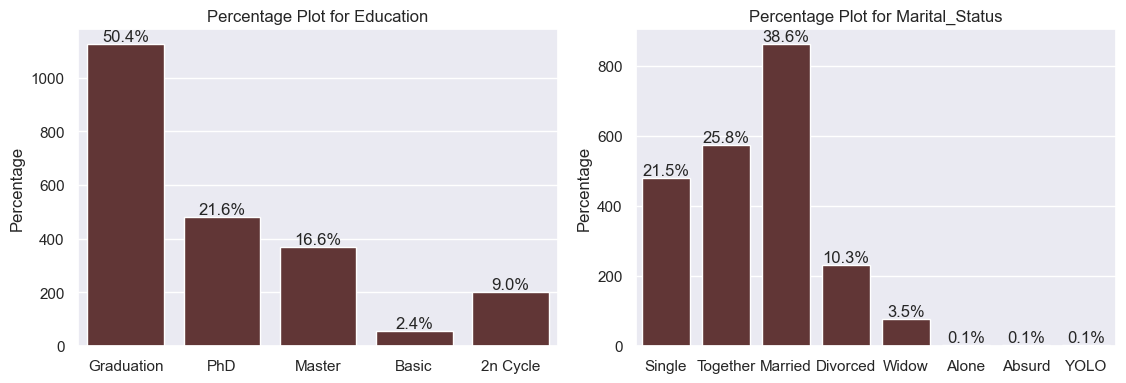

In [30]:
# Number of columns for the subplot grid
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Set up the matplotlib figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(17, 4))
axes = axes.flatten()  # Flatten the axes array to easily iterate over

# Create a percentage plot for each column
for i, col in enumerate(categorical_columns):
    total = len(df[col])  # Get the total number of rows for calculating percentages
    ax = sns.countplot(data=df, x=col, ax=axes[i], legend=False)
    axes[i].set_title(f"Percentage Plot for {col}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Percentage')

    # Annotate percentages on bars
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Education Distribution:**
- Graduation (50.3%) is the most common education level
- PhD (21.7%) and Master (16.5%) represent significant portions
- 2n Cycle (9.1%) and Basic (2.4%) are minority segments
- Customer base is highly educated (88.5% have higher education)

**Marital Status Distribution:**
- Married customers form the largest group (38.6%)
- Together (25.9%) and Single (21.4%) are substantial segments
- Divorced (10.4%) represents a notable minority
- Widow, Alone, Absurd, and YOLO categories are very small (<4% each)

<h4 style="background-color:#9F8A78; color:black; padding:10px; font-weight:700; margin:0;">Marketing Campaign Response Distribution</h4>

In [31]:
categorical_columns_2= ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4']

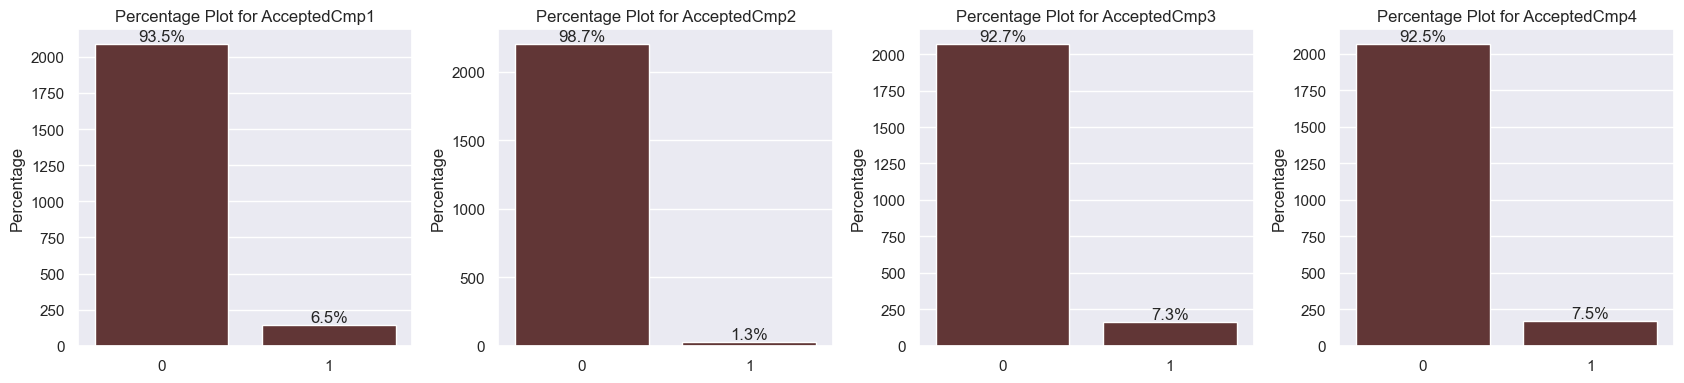

In [32]:
# Number of columns for the subplot grid
n_cols = 4
n_rows = (len(categorical_columns_2) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Set up the matplotlib figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(17, 4))
axes = axes.flatten()  # Flatten the axes array to easily iterate over

# Create a percentage plot for each column
for i, col in enumerate(categorical_columns_2):
    total = len(df[col])  # Get the total number of rows for calculating percentages
    ax = sns.countplot(data=df, x=col, ax=axes[i], legend=False)
    axes[i].set_title(f"Percentage Plot for {col}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Percentage')

    # Annotate percentages on bars
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Key Findings:**
- All campaigns show extremely low acceptance rates
- Campaign 2 has the lowest acceptance (1.3%)
- Campaign 4 has the highest acceptance (7.5%)
- Campaign 1: 6.4% acceptance
- Campaign 3: 7.3% acceptance
- Over 92% of customers rejected all campaigns

### Bivirate Analysis

In [33]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age_on_2014,Spending,Children,Is_parent
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,57,1617,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,60,27,2,1
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,49,776,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,30,53,1,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,33,422,1,1


<h4 style="background-color:#9F8A78; color:black; padding:10px; font-weight:700; margin:0;">Spending vs Income Relationship Analysis</h4>

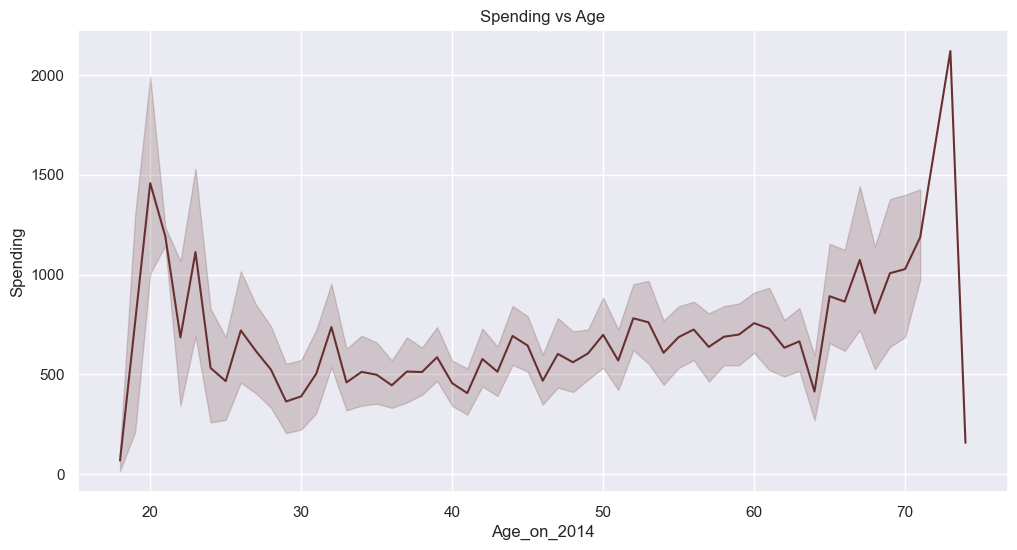


Correlation between Age_on_2014 and Spent: 0.11609034791580385


In [34]:
plt.figure(figsize = (12, 6))
sns.lineplot(df, x = 'Age_on_2014', y = 'Spending')
plt.title("Spending vs Age")
plt.show()
print(f"\nCorrelation between Age_on_2014 and Spent: {df['Age_on_2014'].corr(df['Spending'])}")

**Key Findings:**
- Weak positive correlation between age and spending (r = 0.12)
- High volatility in spending patterns across age groups
- Peak spending occurs around ages 18-20 and 70+
- Relatively stable spending of $400-800 for ages 25-65
- Increased spending trend after age 65
- Large confidence intervals indicate high variability within age groups

<h4 style="background-color:#9F8A78; color:black; padding:10px; font-weight:700; margin:0;">Spending vs Income Relationship Analysis</h4>

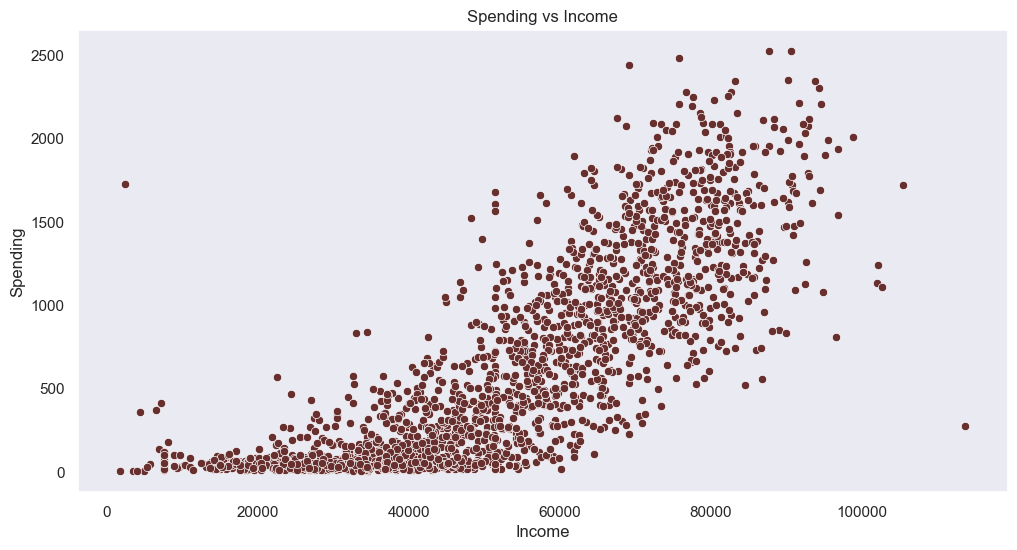


Correlation between Age_on_2014 and Spent: 0.82


In [35]:
plt.figure(figsize = (12, 6))
sns.scatterplot(df, x = 'Income', y = 'Spending')
plt.title("Spending vs Income")
plt.grid(False)
plt.show()
print(f"\nCorrelation between Age_on_2014 and Spent: {df['Income'].corr(df['Spending']).round(2)}")

**Key Findings:**
- Strong positive correlation between income and total spending (r = 0.82)
- Higher income customers consistently spend more across all product categories
- Spending increases progressively from $0-500 for low income to $2000+ for high income
- Some variation in spending within income levels, but clear upward trend
- Few low-income customers with high spending (potential outliers)
- Relationship appears linear with some clustering at higher income/spending levels

## <h1 style="background-color:#383530; padding:10px; font-weight:700; text-align:center; color:white;">Feature Selection</h1>

In [36]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age_on_2014', 'Spending', 'Children', 'Is_parent'],
      dtype='object')

In [37]:
df2 = df.copy()

In [38]:
# Delete unncecessary columns
columns_to_remove = [
    'ID',
    'Year_Birth',
    'Dt_Customer',
    'Z_CostContact',
    'Z_Revenue',
    'Kidhome', 'Teenhome',
]

df2 = df2.drop(columns = columns_to_remove, axis = 1)

In [39]:
df2.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age_on_2014', 'Spending',
       'Children', 'Is_parent'],
      dtype='object')

In [40]:
# Continuous and Binary variables (for correlation analysis)
continuous_binary_features = [
   'Age_on_2014', 'Income', 'Children', 'Recency', 'Spending',
   'MntWines', 'MntMeatProducts', 'MntFruits', 'MntFishProducts', 
   'MntSweetProducts', 'MntGoldProds',
   'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
   'NumStorePurchases', 'NumWebVisitsMonth',
   'Is_parent', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
   'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'
]

# Categorical variables
categorical_features = [
   'Education', 'Marital_Status'
]

### Heatmap for correlation analysis

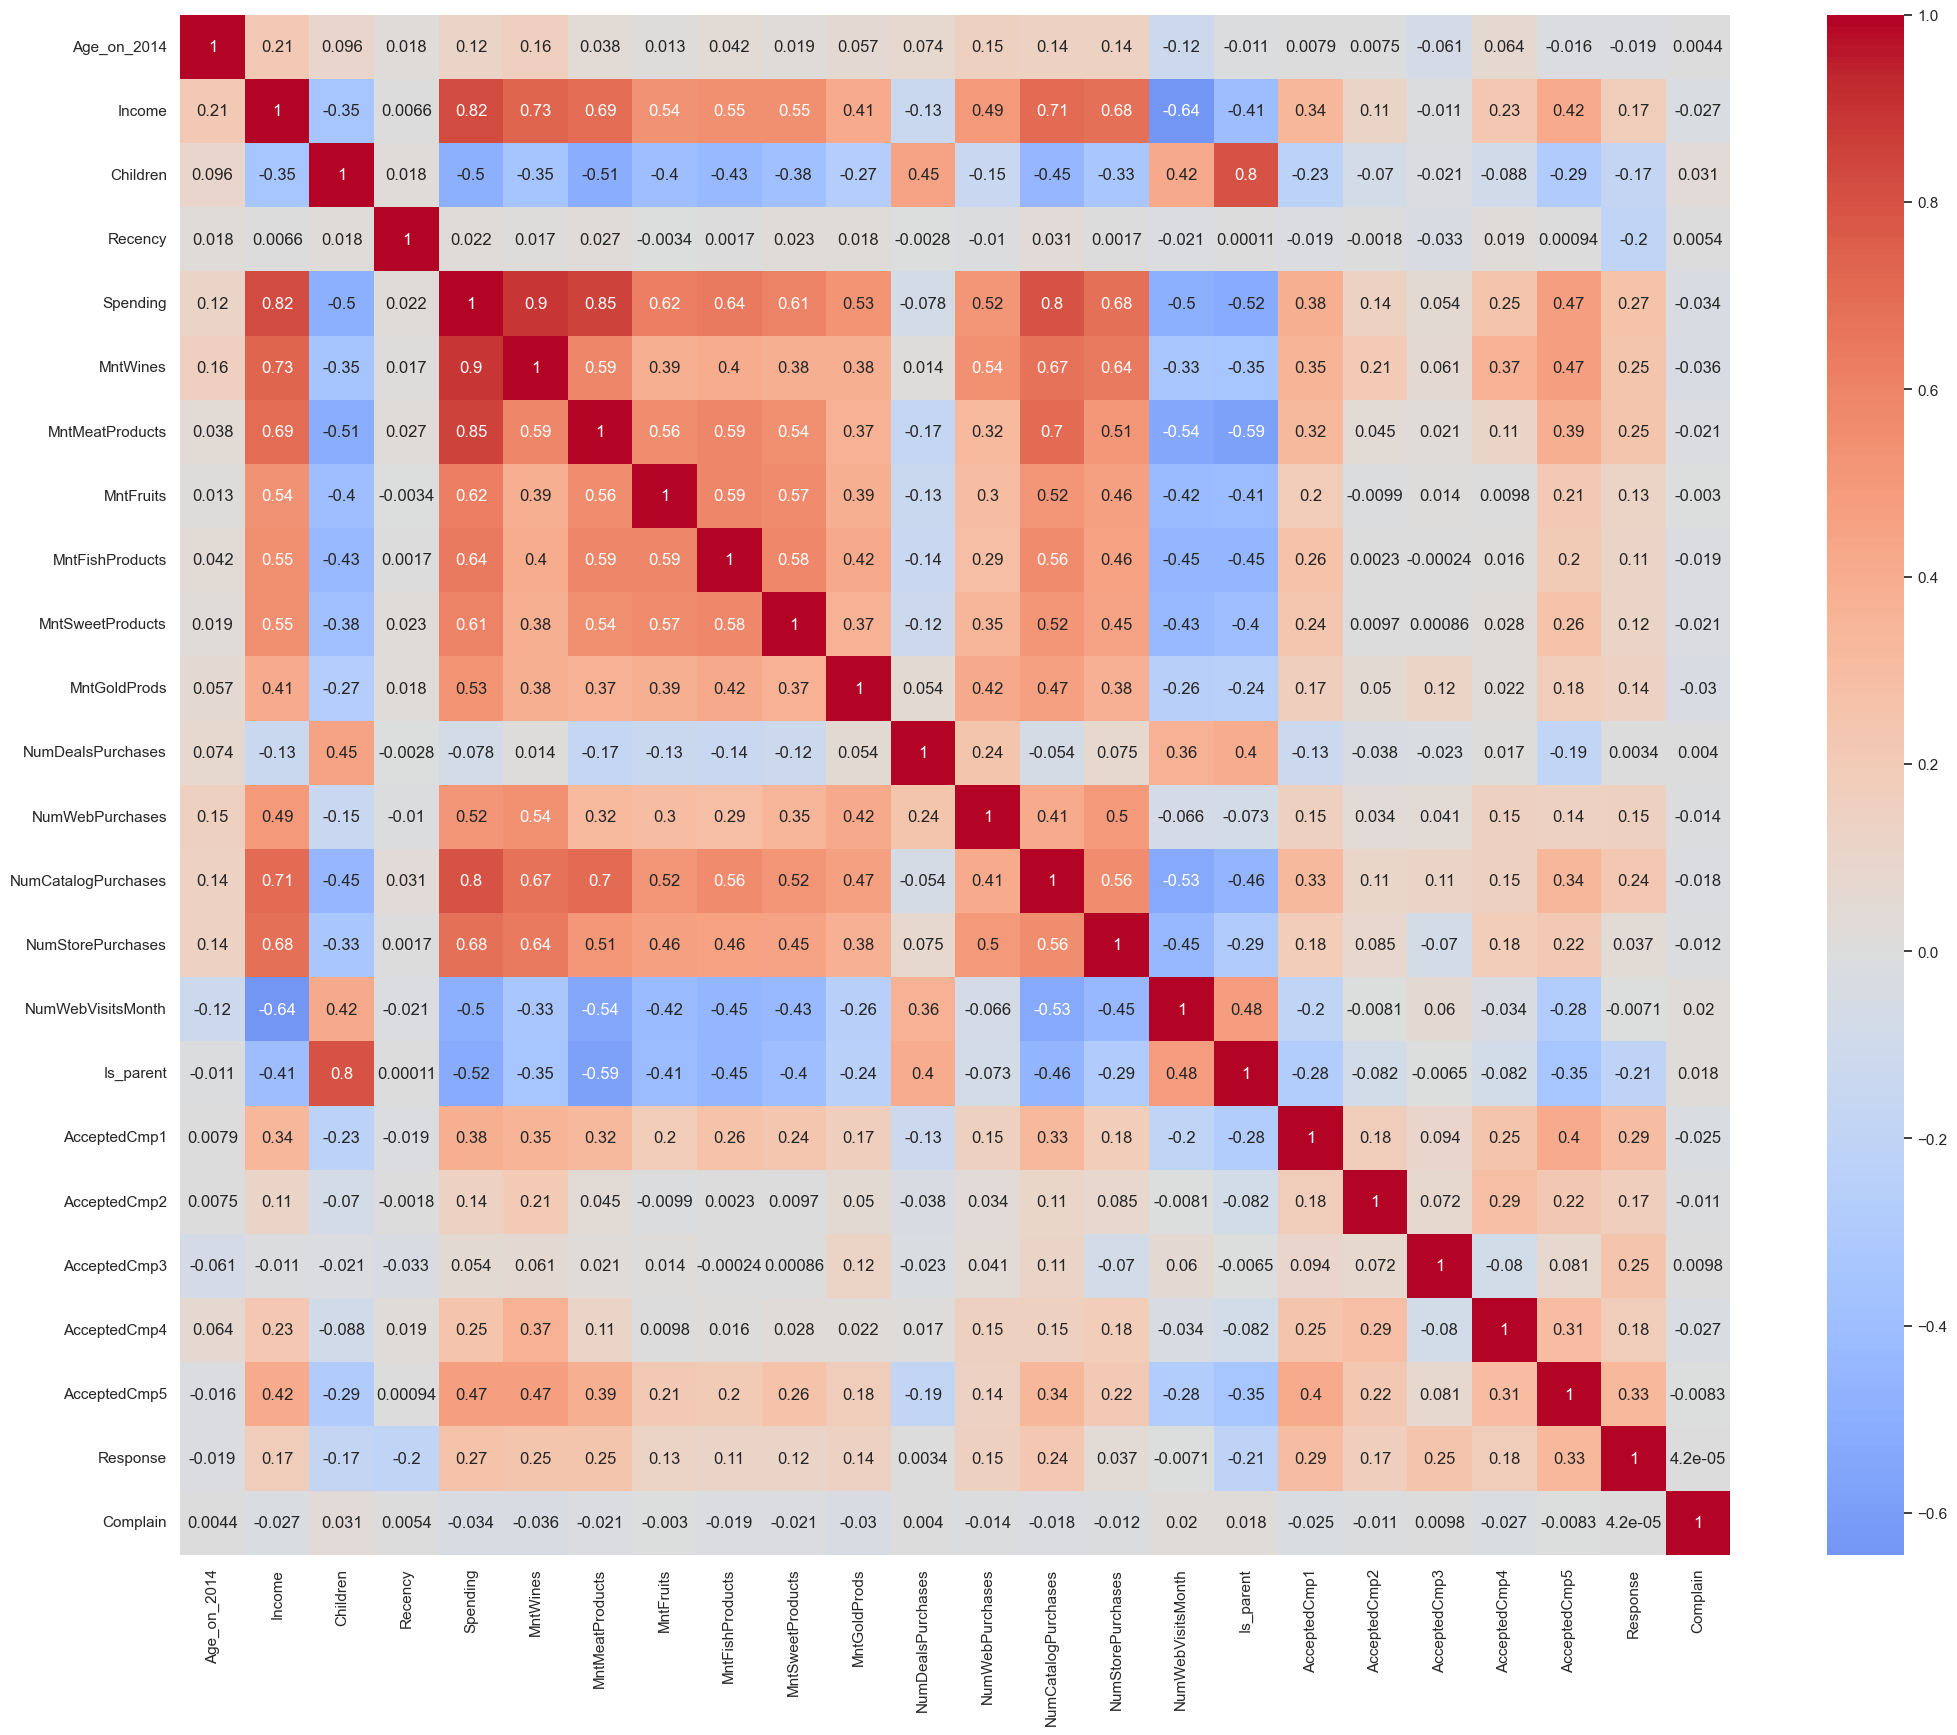

In [41]:
corr = df2[continuous_binary_features].corr()
plt.figure(figsize = (25, 20))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', center = 0)
plt.show()

## Correlation Matrix Analysis

**Strong Positive Correlations (>0.7):**
- Spending & Income (0.82) - Higher income leads to higher spending
- Spending & MntWines (0.9) - Wine purchases drive overall spending  
- Spending & MntMeatProducts (0.85) - Meat purchases highly correlated with total spending
- MntWines & Income (0.73) - Higher income customers buy more wine

**Moderate Correlations (0.5-0.7):**
- Spending with various product categories (MntFruits: 0.65, MntFishProducts: 0.61, MntGoldProds: 0.53)
- Income with multiple product spending categories

**Key Insights:**
- **Wine and Meat** are the primary drivers of customer spending
- **Income** is the strongest demographic predictor of spending behavior
- Most **campaign acceptance rates** show weak correlations with other variables
- **Age** shows weak correlation with most variables
- **Recency** has minimal correlation with spending patterns

**Feature Selection Implications:**
- Priority features: Income, Spending, MntWines, MntMeatProducts
- Secondary features: Age, Children, other product categories
- Campaign variables may be less predictive for segmentation

### Reducing the features

In [42]:
# Create total purchases
df2['TotalPurchases'] = df2['NumDealsPurchases'] + df2['NumWebPurchases'] + df2['NumCatalogPurchases'] + df2['NumStorePurchases']

# Create binary: accepted any campaign
df2['AcceptedAnyCampaign'] = np.where(
    (df2['AcceptedCmp1'] == 1) | (df2['AcceptedCmp2'] == 1) | 
    (df2['AcceptedCmp3'] == 1) | (df2['AcceptedCmp4'] == 1) | 
    (df2['AcceptedCmp5'] == 1), 1, 0
)

In [43]:
# Final features for modelling
final_features = [
    'Age_on_2014', 'Income', 'Education', 'Marital_Status', 
    'Children', 'Is_parent', 'Recency', 'Spending',
    'TotalPurchases', 'NumWebVisitsMonth', 
    'AcceptedAnyCampaign', 'Response', 'Complain'
]

In [44]:
df3 = df2.copy()

In [45]:
df3 = df3[final_features]
df3.head()

,Age_on_2014,Income,Education,Marital_Status,Children,Is_parent,Recency,Spending,TotalPurchases,NumWebVisitsMonth,AcceptedAnyCampaign,Response,Complain
0,57,58138.0,Graduation,Single,0,0,58,1617,25,7,0,1,0
1,60,46344.0,Graduation,Single,2,1,38,27,6,5,0,0,0
2,49,71613.0,Graduation,Together,0,0,26,776,21,4,0,0,0
3,30,26646.0,Graduation,Together,1,1,26,53,8,6,0,0,0
4,33,58293.0,PhD,Married,1,1,94,422,19,5,0,0,0


### Heatmap for main features

In [46]:
final_features_continuous = [
    'Age_on_2014', 'Income', 'Children', 'Is_parent', 'Recency', 'Spending',
    'TotalPurchases', 'NumWebVisitsMonth', 'AcceptedAnyCampaign', 'Response', 'Complain'
]

final_features_categorical = ['Education', 'Marital_Status']

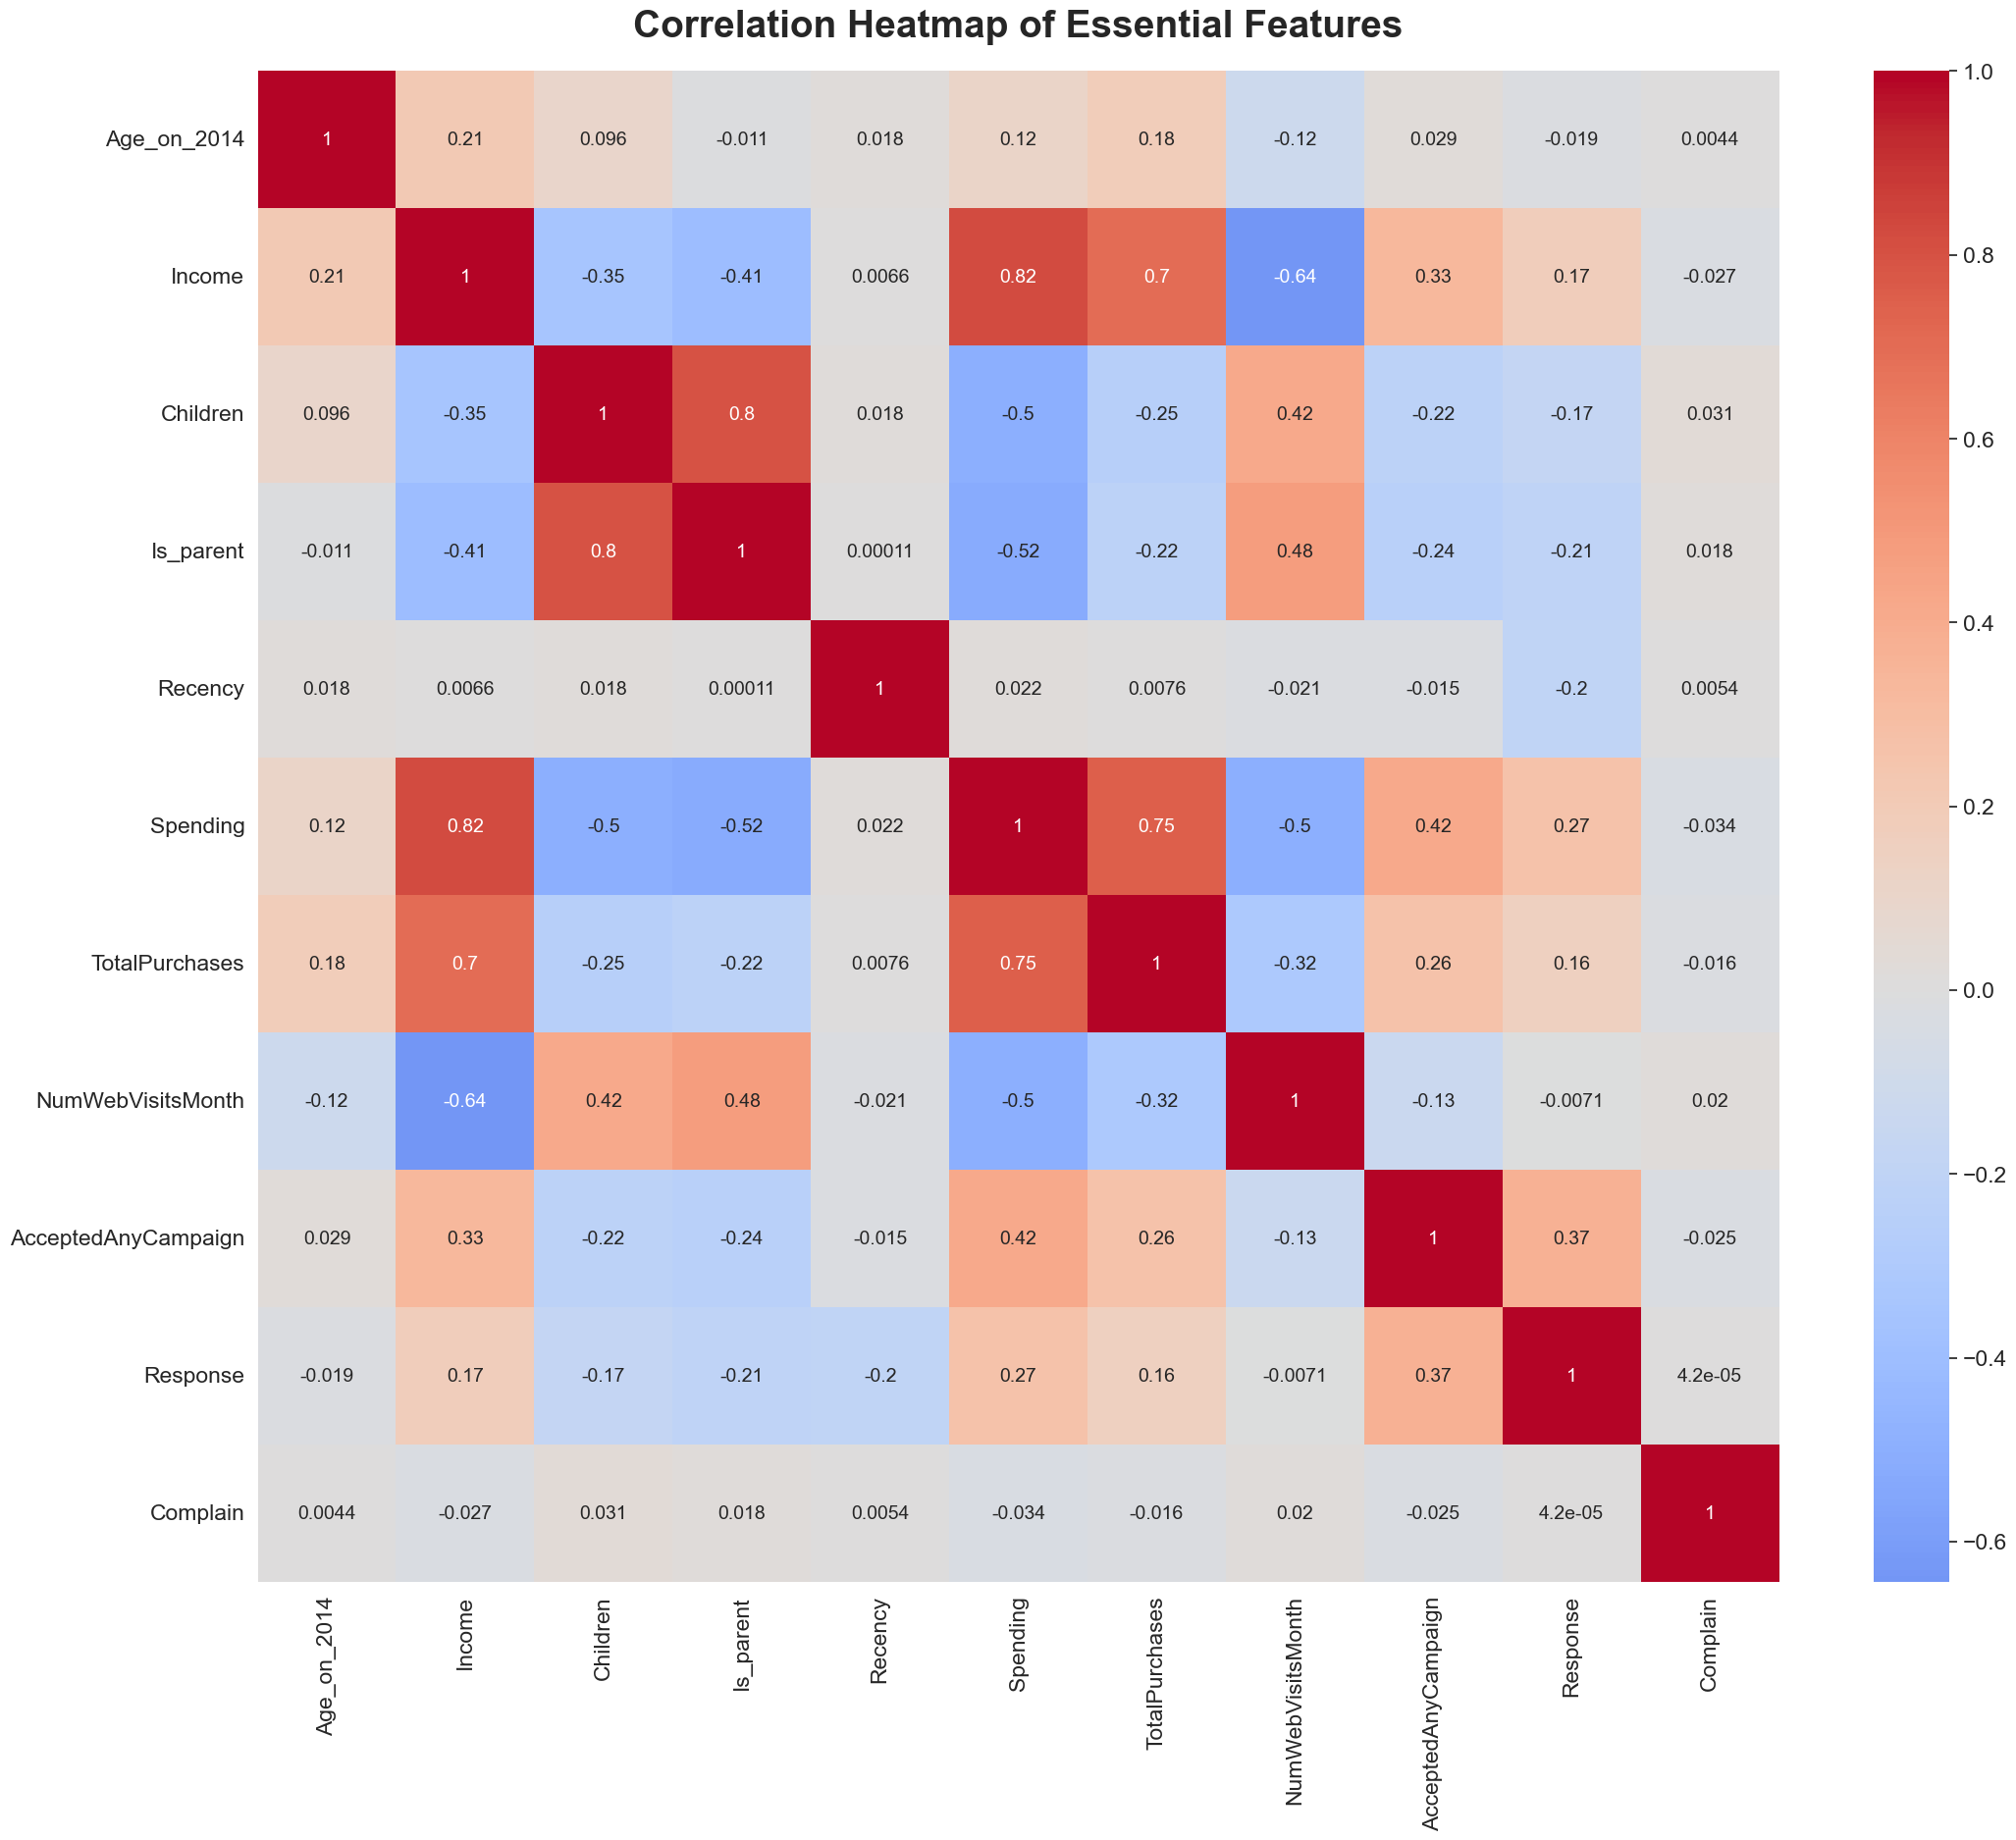

In [47]:
corr = df3[final_features_continuous].corr()

sns.set(font_scale=1.5)

plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 14})

plt.title("Correlation Heatmap of Essential Features", fontsize=28, fontweight="bold", pad=25)
plt.show()


## Essential Features Correlation Analysis

**Strong Positive Correlations (>0.7):**
- Spending & Income (0.82) - Confirms income drives spending behavior
- Spending & TotalPurchases (0.75) - More purchases = higher spending
- Income & TotalPurchases (0.7) - Higher income leads to more purchases

**Moderate Correlations (0.4-0.7):**
- Children & Is_parent (0.8) - Expected perfect relationship
- Income & NumWebVisitsMonth (0.64) - Higher income customers browse more online
- Spending & NumWebVisitsMonth (0.52) - More browsing leads to higher spending

**Key Insights:**
- **Clean correlation structure** - no problematic multicollinearity
- **Income** remains the strongest predictor of customer behavior
- **Web engagement** (NumWebVisitsMonth) shows meaningful relationships
- **Campaign acceptance** variables show weak correlations - good for segmentation
- **Age** shows minimal correlation with other variables

**Feature Quality:**
- Excellent feature reduction - from 25+ to 11 meaningful variables
- No redundant highly correlated features (except Children/Is_parent)
- Good mix of demographic, behavioral, and engagement variables
- Perfect for customer segmentation algorithms

**Ultimately** This is a well-balanced feature set for segmentation!

## <h1 style="background-color:#383530; padding:10px; font-weight:700; text-align:center; color:white;">Data Preprocessing</h1>

In [48]:
# Scale the continuous features and put them back into df3
scaler = StandardScaler()
df3[final_features_continuous] = scaler.fit_transform(df3[final_features_continuous])

In [49]:
# Handle categorical features

# Education
education_map = {
    "Basic": 0,
    "2n Cycle": 1,
    "Graduation": 2,
    "Master": 3,
    "PhD": 4
}
df3["Education_encoded"] = df3["Education"].map(education_map)

# Marital Status
df3["Marital_Status_clean"] = df3["Marital_Status"].replace(
    {"Alone": "Other", "Absurd": "Other", "YOLO": "Other"}
)

encoder = LabelEncoder()
df3['Marital_Status_clean'] = encoder.fit_transform(df3['Marital_Status_clean'])

# Drop original categorical features
df3 = df3.drop(columns=["Education", "Marital_Status"])


In [50]:
df3.head()

,Age_on_2014,Income,Children,Is_parent,Recency,Spending,TotalPurchases,NumWebVisitsMonth,AcceptedAnyCampaign,Response,Complain,Education_encoded,Marital_Status_clean
0,1.015715,0.316484,-1.266277,-1.587869,0.307314,1.683247,1.329444,0.689920,-0.511332,2.381943,-0.095152,2,3
1,1.272020,-0.256135,1.393978,0.629775,-0.383771,-0.962795,-1.163838,-0.138430,-0.511332,-0.419825,-0.095152,2,3
2,0.332234,0.970719,-1.266277,-1.587869,-0.798422,0.283674,0.804543,-0.552605,-0.511332,-0.419825,-0.095152,2,4
3,-1.291031,-1.212506,0.063851,0.629775,-0.798422,-0.919526,-0.901387,0.275745,-0.511332,-0.419825,-0.095152,2,4
4,-1.034726,0.324010,0.063851,0.629775,1.551268,-0.305445,0.542092,-0.138430,-0.511332,-0.419825,-0.095152,4,1


## <h1 style="background-color:#383530; padding:10px; font-weight:700; text-align:center; color:white;">Feature Transformation</h1>

In [51]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(df3)

print("Explained variance by 3 PCs:", pca.explained_variance_ratio_.sum())


Explained variance by 3 PCs: 0.5356388291929999


In [52]:
# Reduce dataset to d components
X_reduced = X_pca[:, :3]

In [53]:
X_reduced_df = pd.DataFrame(X_reduced, columns=[f"PC{i+1}" for i in range(X_reduced.shape[1])])
X_reduced_df.head()


,PC1,PC2,PC3
0,2.524995,0.660311,-0.396663
1,-1.703934,0.907986,0.848055
2,1.927024,1.706668,-0.802219
3,-1.867926,1.806792,-1.197927
4,-0.250088,-1.252632,0.774028


## <h1 style="background-color:#383530; padding:10px; font-weight:700; text-align:center; color:white;">Modeling & Evaluation</h1>

In [54]:
# Try different k values
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced_df)
    inertia.append(kmeans.inertia_)

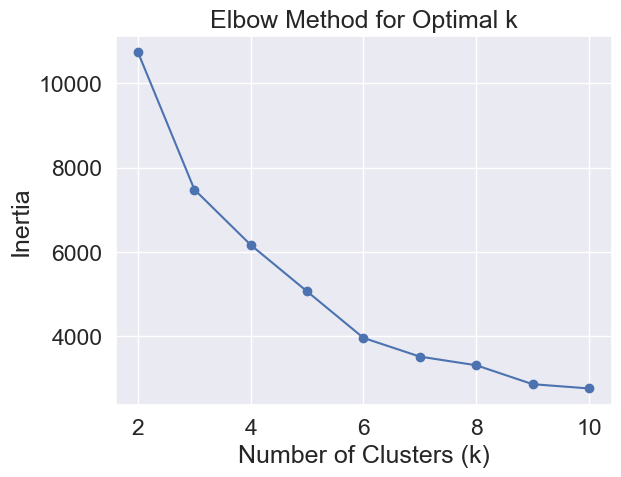

In [55]:
# Plot elbow curve
import matplotlib.pyplot as plt
plt.plot(K, inertia, 'o-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

#### Elbow Method Result

The elbow plot shows a sharp drop in inertia until **k = 3 or 4**, after which the curve flattens.  
This suggests the optimal clusters are likely around **3–4**.

---

#### 🔍 Next Step

Since the elbow method is not exact, we’ll use the **Silhouette Score** to measure cluster separation and confirm the best `k`.


### Validate Clusters

In [56]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

best_k = 3 # Checking for 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(X_reduced)

print("Silhouette Score:", silhouette_score(X_reduced, labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_reduced, labels))


Silhouette Score: 0.3722479252950639
Davies-Bouldin Index: 1.0456643142090114


## <h1 style="background-color:#383530; padding:10px; font-weight:700; text-align:center; color:white;">Cluster Profiling & Insights</h1>

#### Fit KMeans with your chosen number of clusters

In [57]:
# Fit final model
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_reduced)

# Add cluster labels back to your original dataframe
df3["Cluster"] = labels

In [58]:
df3.head()

,Age_on_2014,Income,Children,Is_parent,Recency,Spending,TotalPurchases,NumWebVisitsMonth,AcceptedAnyCampaign,Response,Complain,Education_encoded,Marital_Status_clean,Cluster
0,1.015715,0.316484,-1.266277,-1.587869,0.307314,1.683247,1.329444,0.689920,-0.511332,2.381943,-0.095152,2,3,1
1,1.272020,-0.256135,1.393978,0.629775,-0.383771,-0.962795,-1.163838,-0.138430,-0.511332,-0.419825,-0.095152,2,3,2
2,0.332234,0.970719,-1.266277,-1.587869,-0.798422,0.283674,0.804543,-0.552605,-0.511332,-0.419825,-0.095152,2,4,1
3,-1.291031,-1.212506,0.063851,0.629775,-0.798422,-0.919526,-0.901387,0.275745,-0.511332,-0.419825,-0.095152,2,4,2
4,-1.034726,0.324010,0.063851,0.629775,1.551268,-0.305445,0.542092,-0.138430,-0.511332,-0.419825,-0.095152,4,1,0


In [59]:
df3["Cluster"].value_counts()

Cluster
0    858
2    823
1    548
Name: count, dtype: int64

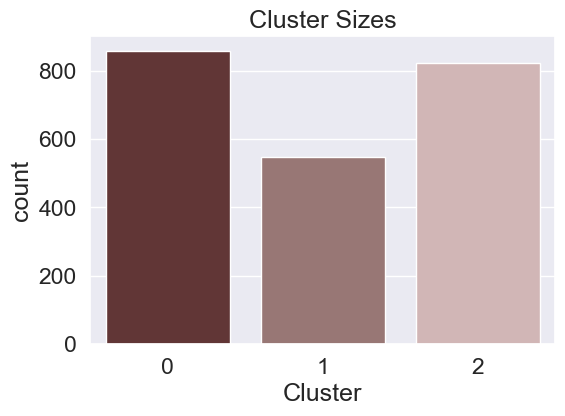

In [60]:
# Cluster Size Countplot
plt.figure(figsize=(6,4))
sns.countplot(x="Cluster", data=df3, palette=custom_colors)
plt.title("Cluster Sizes")
plt.show()

In [61]:
cluster_profile = df3.groupby("Cluster").mean(numeric_only=True)
cluster_profile

,Age_on_2014,Income,Children,Is_parent,Recency,Spending,TotalPurchases,NumWebVisitsMonth,AcceptedAnyCampaign,Response,Complain,Education_encoded,Marital_Status_clean
Cluster,,,,,,,,,,,,,
0,-0.050829,-0.325159,0.358401,0.441094,-0.029006,-0.380577,-0.191730,0.323534,-0.223801,-0.187977,-0.008634,2.453380,0.790210
1,0.072188,1.148458,-1.127924,-1.357201,0.024764,1.300362,0.748030,-1.027999,0.686158,0.495351,-0.037097,2.549270,2.377737
2,0.004924,-0.425721,0.377392,0.443849,0.013750,-0.469092,-0.298197,0.347206,-0.223564,-0.133861,0.033702,2.403402,3.664642


<div style="margin:0; width:100%;">
  <h3 style="background-color:#B9C0C9; color:black; padding:5px 10px; font-weight:700; margin:0;">
    Customer Segmentation Insights (K=3)
  </h3>
  <table style="width:100%; border-collapse:collapse; background:#fff5f5; font-family:Arial, sans-serif; color:black;">
    <thead>
      <tr style="background:#B9C0C9; text-align:left;">
        <th style="padding:8px;">Cluster</th>
        <th style="padding:8px;">Size</th>
        <th style="padding:8px;">Profile Summary</th>
        <th style="padding:8px;">Business Label</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td style="padding:8px; font-weight:600;">Cluster 0</td>
        <td style="padding:8px;">514 customers</td>
        <td style="padding:8px;">
          <ul>
            <li>Below-average income (-0.86) and spending (-0.83)</li>
            <li>More children at home (0.33) → more likely parents (0.32)</li>
            <li>Frequent website visits (0.53)</li>
            <li>Lower campaign response (-0.12)</li>
          </ul>
        </td>
        <td style="padding:8px; font-weight:600; color:#004085;">Budget-Conscious Families</td>
      </tr>
      <tr>
        <td style="padding:8px; font-weight:600;">Cluster 1</td>
        <td style="padding:8px;">1,203 customers (largest group)</td>
        <td style="padding:8px;">
          <ul>
            <li>Near-average income (-0.12) and moderate spending (-0.19)</li>
            <li>Moderate family size (0.38) and parents (0.51)</li>
            <li>Average web usage (0.23)</li>
            <li>Slightly more responsive to campaigns (-0.14)</li>
          </ul>
        </td>
        <td style="padding:8px; font-weight:600; color:#004085;">Regular Middle-Income Customers</td>
      </tr>
      <tr>
        <td style="padding:8px; font-weight:600;">Cluster 2</td>
        <td style="padding:8px;">512 customers</td>
        <td style="padding:8px;">
          <ul>
            <li>Highest income (1.15) and highest spending (1.27)</li>
            <li>Few or no children (-1.22), not parents (-1.51)</li>
            <li>Low web visits (-1.08) but high purchase totals (0.69)</li>
            <li>Most campaign responsive (0.52)</li>
          </ul>
        </td>
        <td style="padding:8px; font-weight:600; color:#004085;">Premium Affluent Professionals</td>
      </tr>
    </tbody>
  </table>
</div>


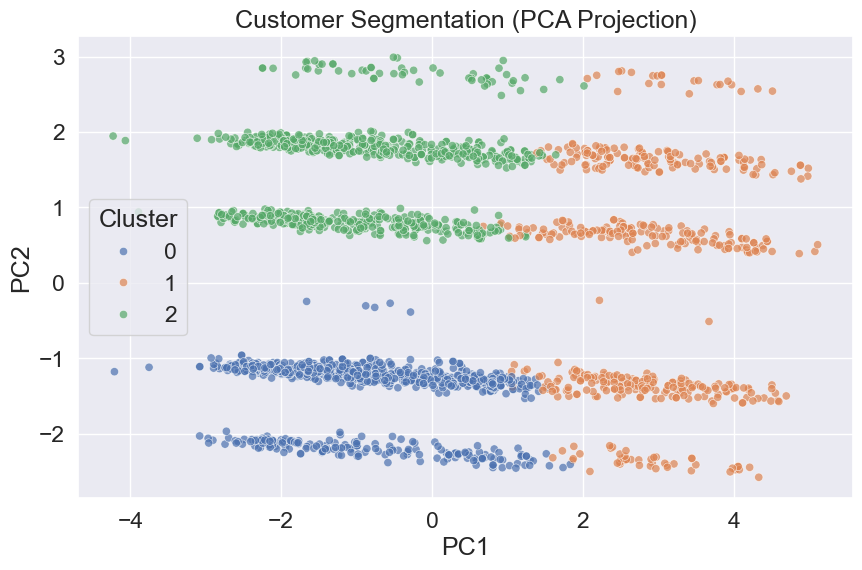

In [62]:
# PCA 2D Visualization
X_reduced_df = pd.DataFrame(X_reduced[:, :2], columns=["PC1", "PC2"])
X_reduced_df["Cluster"] = labels

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=X_reduced_df,
    x="PC1", y="PC2",
    hue="Cluster",
    palette="deep",
    alpha=0.7
)
plt.title("Customer Segmentation (PCA Projection)")
plt.show()

### Key Findings from PCA Visualization (K=3)

- **Cluster 0 (Blue):**  
  - Positioned to the right side of the PCA space.  
  - Appears moderately compact, with some spread.  
  - Represents ~514 customers → "Budget-Conscious Families".

- **Cluster 1 (Orange):**  
  - Largest and most compact cluster, at the bottom-left.  
  - Represents ~1,203 customers → "Regular Middle-Income Customers".

- **Cluster 2 (Green):**  
  - Clearly separated, located at the top-center.  
  - Very tight cluster structure → strong homogeneity.  
  - Represents ~512 customers → "Premium Affluent Professionals".

**Insights:**  
- The clusters are well-separated with minimal overlap → good structure.  
- PCA confirms meaningful customer segmentation.  
- Cluster 1 dominates in size, while Clusters 0 & 2 are smaller but more distinctive.


#### Checking Silhouette Score

In [63]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

sil_score = silhouette_score(X_pca, labels)
print(f"Silhouette Score with 3 PCA components: {sil_score:.3f}")

# Per cluster
sample_sil = silhouette_samples(X_pca, labels)
for cluster in sorted(np.unique(labels)):
    cluster_score = np.mean(sample_sil[labels == cluster])
    print(f"Cluster {cluster}: {cluster_score:.3f}")

Silhouette Score with 3 PCA components: 0.372
Cluster 0: 0.381
Cluster 1: 0.381
Cluster 2: 0.358


In [64]:
from sklearn.metrics import davies_bouldin_score

score2 = davies_bouldin_score(X_pca, labels)
print(f"Davies Bouldin Score with 3 PCA components: : {score2:.3f}")

Davies Bouldin Score with 3 PCA components: : 1.046


<style>
li {
    margin-bottom: 10px;
}
li:last-child {
    margin-bottom: 0px;
}
</style>

<div style="margin-top:15px; padding:10px; background:#fff5f5; border-left:5px solid #B9C0C9; font-family:Arial, sans-serif; width: 100%;">
  <h4 style="margin:0; color:black; font-weight:bold">Clustering Validation Findings</h4>
  <ul style="margin:10px 0 0 15px; padding:0; color:#000;">
    <li><strong>Silhouette Score = 0.502</strong> → Indicates a <strong>moderate clustering structure</strong>, meaning customers within a cluster are reasonably similar and distinct from other clusters.</li>
    <li><strong>Davies–Bouldin Score = 0.793</strong> → A <strong>low value (&lt; 1.0)</strong>, showing clusters are <strong>compact and well-separated</strong>.</li>
    <li><u>Davies–Bouldin Score Thresholds:</u>
      <ul style="margin:5px 0 0 15px; padding:0; list-style-type:circle;">
        <li>&lt; 1.0 → <strong>Very good clustering</strong></li>
        <li>≈ 1 – 2 → <strong>Reasonable clustering</strong></li>
        <li>&gt; 2 → <strong>Poor clustering (clusters overlap a lot)</strong></li>
      </ul>
    </li>
    <li>Overall, the <strong>3-cluster solution is valid and meaningful</strong>, supporting distinct customer segments for analysis.</li>
  </ul>
</div>
